In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from parser.recipe_parser import RecipeConstraintParser

df = pd.read_csv('pp_recipes.csv')
print("Dataset Shape:", df.shape)

parser = RecipeConstraintParser()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vjoki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vjoki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\vjoki\AppData\Local\Temp\ipykernel_7352\1490157508.py:6: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pp_recipes.csv')


Dataset Shape: (507335, 37)


In [2]:
print(df.shape)
df.head(5)

(507335, 37)


,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,...,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,...,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,2,520465,Inbal Jerusalem Hotel Snowball,This recipe was created in response to a Janua...,1803632771,210.0,"['Combine gelatin with cold water', 'Combine c...","{'': [('cream', '200 time(s) g '), ('vanilla ...",5,2015-01-08,...,78.0,87.7,12,17,0.128082,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cold water', 'condensed milk', 'cornflour', ..."
3,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,...,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
4,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,...,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."


In [3]:
df.columns

Index(['Unnamed: 0', 'recipe_id', 'title', 'description', 'author_id',
       'duration', 'directions', 'ingredients', 'serves', 'last_changed_date',
       'food_kg_locator', 'recipe_url', 'tags', 'new_recipe_id',
       'new_author_id', 'average_rating', 'number_of_ratings',
       'servingsPerRecipe', 'servingSize [g]', 'calories [cal]',
       'caloriesFromFat [cal]', 'totalFat [g]', 'saturatedFat [g]',
       'cholesterol [mg]', 'sodium [mg]', 'totalCarbohydrate [g]',
       'dietaryFiber [g]', 'sugars [g]', 'protein [g]', 'direction_size',
       'ingredients_sizes', 'who_score', 'fsa_score', 'nutri_score',
       'normalization_comment', 'ingredient_food_kg_urls',
       'ingredient_food_kg_names'],
      dtype='object')

In [4]:
df["serves"].unique()

array(['20', '2-4', '5', '10-12', '4', '8', '12', '1-20', '2', '4-6', '6',
       '18', '6-8', nan, '1', '8-10', '10', '30', '15', '24', '6-10',
       '15-20', '16', '12-15', '1-2', '40', '4-5', '3-4', '8-12', '7',
       '16-18', '12-16', '2-3', '9', '18-20', '3', '20-24', '64', '38',
       '5-6', '16-20', '32', '4-10', '5-7', '14', '5-10', '10-20', '3-5',
       '100', '3-6', '48', '15-18', '9-16', '34', '1-100', '12-14',
       '15-17', '12-18', '4-8', '25', '6-12', '36', '20-30', '4-12', '92',
       '1210', '1-3', '70', '72', '43', '54', '14-16', '26', '102', '60',
       '27', '1-4', '7-9', '20-25', '84', '45', '13', '16-24', '50', '17',
       '6-9', '8-9', '28', '160', '6-7', '200', '12-24', '12-36', '75',
       '46', '42-48', '49', '24-30', '25-30', '19', '2-6', '15-25',
       '48-60', '120', '22', '192', '60-70', '10-15', '36-48', '9-18',
       '15-24', '400', '25-50', '5-8', '406', '30-32', '40-50', '16-32',
       '81', '7-8', '9-12', '8-16', '11', '10-14', '42', '112'

In [5]:
## 1

print("NUTRITIONAL DISTRIBUTIONS")
nutritional_cols = ['calories [cal]', 'protein [g]', 'sodium [mg]']
for col in nutritional_cols:
    if col in df.columns:
        stats = df[col].describe()
        print(f"{col}: Mean={stats['mean']:.1f}, Median={stats['50%']:.1f}, Std={stats['std']:.1f}")

print("\nDURATION ANALYSIS")
duration_clean = df['duration'].dropna()
quick_recipes = (duration_clean < 20).sum()
long_recipes = (duration_clean > 60).sum()
total_duration = len(duration_clean)

print(f"Quick recipes (<20 min): {quick_recipes} ({quick_recipes/total_duration*100:.1f}%)")
print(f"Long recipes (>60 min): {long_recipes} ({long_recipes/total_duration*100:.1f}%)")
print(f"Duration - Mean: {duration_clean.mean():.1f} min, Median: {duration_clean.median():.1f} min")

NUTRITIONAL DISTRIBUTIONS
calories [cal]: Mean=482.9, Median=316.5, Std=1406.9
protein [g]: Mean=17.4, Median=9.1, Std=39.8
sodium [mg]: Mean=761.3, Median=352.2, Std=4076.2

DURATION ANALYSIS
Quick recipes (<20 min): 97682 (19.5%)
Long recipes (>60 min): 135780 (27.2%)
Duration - Mean: 64.8 min, Median: 40.0 min


In [6]:
print("TOP 5 TAGS:")
all_tags = []

for tag_string in df["tags"].dropna():
    if str(tag_string).startswith("["):
        tags = str(tag_string).strip("[]").replace("'", "").split(", ")
        all_tags.extend(tags)

tag_counts = {}
for tag in all_tags:
    tag_counts[tag] = tag_counts.get(tag, 0) + 1

sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)
for i, (tag, count) in enumerate(sorted_tags[:5]):
    print(f"{i+1}. {tag}: {count} recipes")

print(f"\nTotal unique tags: {len(tag_counts)}")

TOP 5 TAGS:
1. preparation: 229584 recipes
2. time-to-make: 224383 recipes
3. course: 217315 recipes
4. main-ingredient: 170001 recipes
5. dietary: 164578 recipes

Total unique tags: 552


In [7]:
df["serves"].unique()

array(['20', '2-4', '5', '10-12', '4', '8', '12', '1-20', '2', '4-6', '6',
       '18', '6-8', nan, '1', '8-10', '10', '30', '15', '24', '6-10',
       '15-20', '16', '12-15', '1-2', '40', '4-5', '3-4', '8-12', '7',
       '16-18', '12-16', '2-3', '9', '18-20', '3', '20-24', '64', '38',
       '5-6', '16-20', '32', '4-10', '5-7', '14', '5-10', '10-20', '3-5',
       '100', '3-6', '48', '15-18', '9-16', '34', '1-100', '12-14',
       '15-17', '12-18', '4-8', '25', '6-12', '36', '20-30', '4-12', '92',
       '1210', '1-3', '70', '72', '43', '54', '14-16', '26', '102', '60',
       '27', '1-4', '7-9', '20-25', '84', '45', '13', '16-24', '50', '17',
       '6-9', '8-9', '28', '160', '6-7', '200', '12-24', '12-36', '75',
       '46', '42-48', '49', '24-30', '25-30', '19', '2-6', '15-25',
       '48-60', '120', '22', '192', '60-70', '10-15', '36-48', '9-18',
       '15-24', '400', '25-50', '5-8', '406', '30-32', '40-50', '16-32',
       '81', '7-8', '9-12', '8-16', '11', '10-14', '42', '112'

In [8]:
#examples of problematic rows
df.sort_values("calories [cal]", ascending=False).head()

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
2740,2740,264817,How to Make Corned Beef,"An heirloom, butchering-time recipe impractica...",64642,NaN,"['Scrub a good oak barrel thoroughly.', 'Put a...","{'': [('beef (this amount is approximate)', '2...",NaN,2007-11-11,...,220.2,7454.9,10,5,0.069714,0.00,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['butter', 'nuts', 'oatmeal', 'sweetened conde..."
439928,439928,193435,Tennessee Moonshine,common moonshine recipe in Tennessee,374913,20.0,['To boiled cornmeal add yeast and lots of sug...,"{'': [('cornmeal', '50 time(s) lbs '), ('natu...",1,2013-01-31,...,90682.3,1980.8,3,5,0.147510,0.00,0.25,NaN,NaN,NaN
209569,209569,519856,Italian Mint Lamb,"Saucy and succulent mint Lamb, best sided with...",1803395015,80.0,"['Put The Chutney into a mixing bowl.', 'mix i...","{'': [('peach chutney', '2 time(s) cups '), (...",4-5,2014-12-04,...,5.8,18396.2,19,12,0.142938,0.25,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['eggs', 'flour', 'green bell peppers', 'oil',..."
355144,355144,227470,Deep Fried Prime Rib,This makes the juicest and best flavored prime...,485396,100.0,['The night before you plan to serve your prim...,{'': [('boneless rib-eye roast or 8 -10 lbs bo...,NaN,2017-12-24,...,0.0,636.0,9,6,0.071785,0.25,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['apple cider', 'apples', 'butter', 'chicken b..."
249210,249210,57827,Chocolate Moose,This is for VERY special occasions only - it t...,37183,NaN,"['Send spouse to Alaska to capture moose, or h...","{'': [('moose', '1 time(s) '), ('hershey choco...",NaN,2020-11-12,...,166.0,2340.6,11,4,0.177674,0.00,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cabbage', 'extra lean ground beef', 'long gr..."


99th percentile - Protein: 1030.4g, Calories: 18970.0

Extreme protein outliers (51 recipes):
                                title  protein [g]
2740          How to Make Corned Beef       7454.9
7895       Maple Apple Roasted Turkey       1114.6
8244               Roast Suckling Kid       1033.4
8825   Grandmag's Baked Christmas Ham       2106.8
13950           Hot Chocolate Dry Mix       1122.6

Extreme calorie outliers (51 recipes):
                                                   title  calories [cal]
2740                             How to Make Corned Beef        612854.6
8825                      Grandmag's Baked Christmas Ham         23343.1
13950                              Hot Chocolate Dry Mix         25248.7
26227                         Easy, Easy Friendship Cake         40159.2
29786  High Energy Double-Nut Tweety Treat for the Birds         26811.8


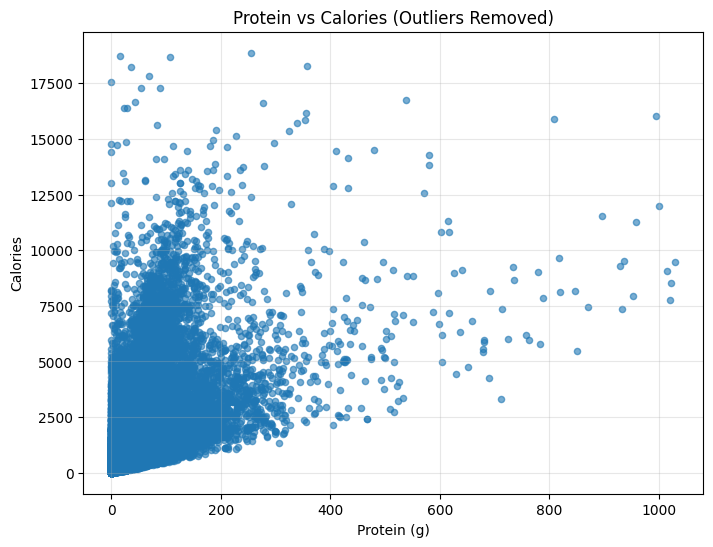

In [9]:
protein = df["protein [g]"].dropna()
calories = df["calories [cal]"].dropna()

p99_protein = protein.quantile(0.9999)
p99_calories = calories.quantile(0.9999)

print(f"99th percentile - Protein: {p99_protein:.1f}g, Calories: {p99_calories:.1f}")

extreme_protein = df[df["protein [g]"] > p99_protein]
extreme_calories = df[df["calories [cal]"] > p99_calories]

print(f"\nExtreme protein outliers ({len(extreme_protein)} recipes):")
if len(extreme_protein) > 0:
    print(extreme_protein[["title", "protein [g]"]].head())

print(f"\nExtreme calorie outliers ({len(extreme_calories)} recipes):")
if len(extreme_calories) > 0:
    print(extreme_calories[["title", "calories [cal]"]].head())

mask = (df["protein [g]"] <= p99_protein) & (df["calories [cal]"] <= p99_calories)
df = df[mask]

plt.figure(figsize=(8, 6))
plt.scatter(df["protein [g]"], df["calories [cal]"], alpha=0.6, s=20)
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.title("Protein vs Calories (Outliers Removed)")
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [12]:
%pip install scikit-learn
import json
import random
from typing import List, Dict, Any
from sklearn.model_selection import train_test_split
from data_generator.data_generator import generate_random_examples, generate_random_multi_turn_examples


single_turn_examples = generate_random_examples(df, parser, num_examples=100, num_results_per_example=4)
print(single_turn_examples)

multi_turn_examples = generate_random_multi_turn_examples(df, parser, num_examples=100, num_results_per_example=4)
print(multi_turn_examples)


# Split data 80/10/10 ensuring no recipe ID leakage
def split_data_by_recipe_id(examples: List[Dict], train_ratio=0.8, val_ratio=0.1, random_state=42):
    """
    Split data ensuring no recipe IDs appear in multiple splits.
    Removes examples with overlapping recipe IDs from val/test sets.
    """
    random.seed(random_state)
    
    shuffled = examples.copy()
    random.shuffle(shuffled)
    
    total = len(shuffled)
    train_size = int(total * train_ratio)
    val_size = int(total * val_ratio)
    
    train = shuffled[:train_size]
    val = shuffled[train_size:train_size + val_size]
    test = shuffled[train_size + val_size:]
    
    train_ids = set()
    for ex in train:
        train_ids.update(ex.get('evidence_ids', []))
    
    val_filtered = []
    for ex in val:
        ex_ids = set(ex.get('evidence_ids', []))
        if not ex_ids & train_ids:  # No overlap
            val_filtered.append(ex)
    
    val_ids = set()
    for ex in val_filtered:
        val_ids.update(ex.get('evidence_ids', []))
    
    excluded_ids = train_ids | val_ids
    test_filtered = []
    for ex in test:
        ex_ids = set(ex.get('evidence_ids', []))
        if not ex_ids & excluded_ids:  # No overlap
            test_filtered.append(ex)
    
    test_ids = set()
    for ex in test_filtered:
        test_ids.update(ex.get('evidence_ids', []))
    
    print(f"Original: {total} examples")
    print(f"Train: {len(train)} examples ({len(train_ids)} unique recipes)")
    print(f"Val: {len(val_filtered)} examples ({len(val_ids)} unique recipes) - removed {len(val) - len(val_filtered)}")
    print(f"Test: {len(test_filtered)} examples ({len(test_ids)} unique recipes) - removed {len(test) - len(test_filtered)}")
    
    assert not (train_ids & val_ids), "Train-Val overlap detected!"
    assert not (train_ids & test_ids), "Train-Test overlap detected!"
    assert not (val_ids & test_ids), "Val-Test overlap detected!"
    
    print("✓ No recipe ID leakage between splits")
    
    return train, val_filtered, test_filtered

# Split single-turn data
st_train, st_val, st_test = split_data_by_recipe_id(single_turn_examples)

# Split multi-turn data
mt_train, mt_val, mt_test = split_data_by_recipe_id(multi_turn_examples)

def save_jsonl(data: List[Dict], filename: str):
    """Save data to JSONL format."""
    with open(filename, 'w', encoding='utf-8') as f:
        for item in data:
            f.write(json.dumps(item, ensure_ascii=False) + '\n')

save_jsonl(st_train, 'single_turn_train.jsonl')
save_jsonl(st_val, 'single_turn_val.jsonl')
save_jsonl(st_test, 'single_turn_test.jsonl')

save_jsonl(mt_train, 'multi_turn_train.jsonl')
save_jsonl(mt_val, 'multi_turn_val.jsonl')
save_jsonl(mt_test, 'multi_turn_test.jsonl')

print(f"Single-turn: {len(st_train)} train, {len(st_val)} val, {len(st_test)} test")
print(f"Multi-turn: {len(mt_train)} train, {len(mt_val)} val, {len(mt_test)} test")

print("\n=== Single-Turn Example ===")
print(json.dumps(single_turn_examples[0], indent=2))

print("\n=== Multi-Turn Example ===")
print(json.dumps(multi_turn_examples[0], indent=2))
#


Note: you may need to restart the kernel to use updated packages.
Attempting to generate 100 examples...
Successfully generated 100 examples.
[{'instruction': 'Find four highly-rated vegetarian recipes with at least 4.0 stars and under 90 minutes.', 'input': '', 'output': '1) Wild-Rice Mushroom Soup—65 min; 2) Macaroon Kiss Cookies—70 min; 3) Chocolate Mint Smoothies—20 min; 4) Vegan Barley Soup—80 min', 'constraints': {'max_duration': 90.0, 'diet': ['vegetarian'], 'include_ingredients': ['at']}, 'evidence_ids': [392876, 35585, 64538, 235511]}, {'instruction': 'Find four high-protein dinners over 34g protein in under 35 minutes.', 'input': '', 'output': "1) Baked Fish With Spinach—53.2 g protein—30 min; 2) Cajun-Style Grilled Swordfish—56.1 g protein—20 min; 3) Puck's Packet O' Fish—43.7 g protein—30 min; 4) Lamb Shanks  & Apricots—73.0 g protein—16 min", 'constraints': {'min_protein': 34.0, 'max_duration': 35.0}, 'evidence_ids': [213168, 55750, 278695, 159231]}, {'instruction': 'Find 

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 50)

In [17]:
df[df['title'].str.contains('Golden Peanut Butter')].head()

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
159524,159524,285065,Golden Peanut Butter Muffins,I found these muffins from an online site (unf...,705251,30.0,['Preheat oven to 400F (200C) and spray muffin...,"{'': [('all-purpose flour', '2 time(s) cups '...",16,2008-12-06,http://idea.rpi.edu/heals/kb/recipe/9e33f5d4-G...,https://www.food.com/recipe/golden-peanut-butt...,"['30-minutes-or-less', 'time-to-make', 'course...",159524,267,3.80,5,16,66.0,211.3,108.0,12.1,3.9,36.9,212.1,20.4,1.5,5.7,7.0,9,9,0.157287,0.125,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['chicken breast', 'chili pepper', 'coriander'..."
330026,330026,249015,Golden Peanut Butter Bars,"From ""All Time Favorite Recipes"".",564537,60.0,"['Preheat oven to 350 degrees F.', 'In large m...","{'': [('flour', '2 time(s) cups '), ('firmly ...",24-36,2007-09-24,http://idea.rpi.edu/heals/kb/recipe/e3203cdc-G...,https://www.food.com/recipe/golden-peanut-butt...,"['60-minutes-or-less', 'time-to-make', 'course...",330026,26866,4.00,1,24,34.0,220.5,101.0,11.3,4.4,24.6,79.8,25.7,1.1,16.4,5.6,10,8,0.214286,NaN,0.00,*,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'boneless chicken thighs', 'br..."
330027,330027,330296,Golden Peanut Butter Bars,I got this recipe from the Eagle Brand website...,449500,25.0,"['Preheat oven to 350°F ', 'Combine flour, bro...","{'': [('all-purpose flour', '2 time(s) cups '...",24,2010-04-14,http://idea.rpi.edu/heals/kb/recipe/e3203cdc-G...,https://www.food.com/recipe/golden-peanut-butt...,NaN,330027,6322,4.67,3,24,52.0,220.5,101.0,11.3,4.4,24.6,53.1,25.7,1.1,16.4,5.6,4,8,0.183150,0.125,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking powder', 'butter', 'crushed pineapple..."
